In [13]:
from radd import fit, build, utils, vis
from copy import deepcopy

In [16]:
data = prodf_store.prodata
tp = prodf_store.ttheta
vp = prodf_store.vtheta
vp['v'] = np.mean(prodf_store.vopt.values())

In [86]:
inits = dict(deepcopy(vp))
m = build.Model(data=data, inits=inits, kind='xpro', fit_on='average', depends_on={'v':'pGo'}, weighted=True)


      Model is prepared to fit on average xpro data, allowing
      Drift-Rate to vary across levels of pGo (0, 20, 40, 60, 80, 100) 

      Optimize On, Wayne 


In [191]:
vp['xb']=1.9

In [192]:
m.set_fitparams()
vp['v'] = np.sort(prodf_store.vopt.values())
x=fit.Simulator(fitparams=m.fitparams, inits=m.inits, pc_map=m.pc_map, kind=m.kind)
x.ntot = 1000
dvg = x.simulate_xpro(vp, )
#clr = ppal(6)

In [193]:
bmu = np.array([np.array([np.cumsum(dvg[i][ii])[-1] for ii in range(1000)]) for i in range(m.ncond)])

In [194]:
bmu.mean(axis=1)

array([ 167.50127688,  184.14703213,  199.39061691,  210.9614776 ,
        228.99326625,  233.92505238])

In [156]:
x = bold[:, -1]

In [151]:
x = bold.cumsum(axis=0).mean(axis=0)

In [152]:
x

array([ 1.2609858 ,  1.18667389,  1.16270784, ...,  1.19102451,
        1.16129639,  1.10052309])

In [131]:
bold.mean(axis=0)

array([ 216.98197509,  210.04217133,  194.81561558, ...,  203.77837079,
        210.7557854 ,  200.23189523])

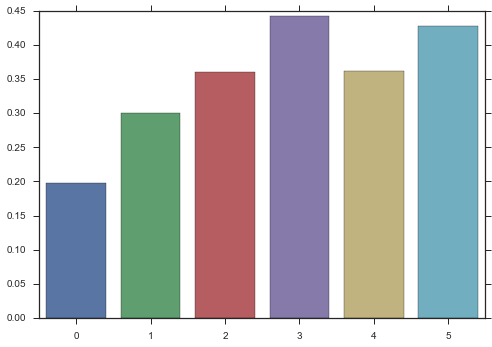

In [157]:
sns.barplot(x=np.arange(6), y=x)

In [121]:
for ii, i in enumerate(dvg[:, 0, :]):
      plt.plot(i, color=clr[ii])
      plt.hlines(y=m.popt['a'][0], xmin=0, xmax=len(i))
plt.gca().set_ylim(0,m.popt['a'][0])

NameError: name 'clr' is not defined